# Statistics Cheat Sheet

## Table of Contents
* [Descriptive Statistics](#descriptive-statistics)
    * [Measures of Central Tendency](#measures-of-central-tendency)
    * [Measures of Dispersion](#measures-of-dispersion)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Using the Iris dataset as an example

# Load the iris dataset
dataset = sns.load_dataset('iris')

# Select only numerical columns
df = dataset.select_dtypes(include = 'number')

## Descriptive Statistics

### Measures of Central Tendency
- **Mean** (μ or x̄):  
  $$
  \mu = \frac{1}{n} \sum_{i=1}^{n} x_i
  $$
- **Median**: Middle value in sorted data
- **Mode**: Most frequent value(s)

##### Examples with python:

In [3]:
# Example using pandas
data = [1, 2, 2, 3, 4, 5, 5, 5, 6]
series = pd.Series(data)

mean = series.mean()
median = series.median()
mode = series.mode()[0] # Mode returns a data series, that's why we are using to_list, and we use [0] to get the first item of 

print("Pandas Example")
print(f"Mean: {mean:.2f}")
print(f"Median: {median}")
print(f"Mode: {mode}")

Pandas Example
Mean: 3.67
Median: 4.0
Mode: 5


In [4]:
# More complete example
mean = df.mean()
median = df.median()
mode = df.mode().iloc[0]  # Mode returns a data series, and we use [0] to get the first item. Beware, this can return multiple values!

central_tendency = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Mode': mode
})

central_tendency

,Mean,Median,Mode
sepal_length,5.843333,5.80,5.0
sepal_width,3.057333,3.00,3.0
petal_length,3.758000,4.35,1.4
petal_width,1.199333,1.30,0.2


### Measures of Dispersion
- **Range**:
  $$
  Range = Max - Min
  $$
- **Variance (σ²)**:  
  $$
  \sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2
  $$
- **Standard Deviation (σ)**:  
  $$
  \sigma = \sqrt{\sigma^2}
  $$
- **Interquartile Range (IQR)**: 
  $$ 
  IQR = Q3 - Q1
  $$
  
##### Example with Python:

In [5]:
# Compute measures of dispersion
dispersion = pd.DataFrame({
    'Range': df.max() - df.min(),
    'Variance': df.var(),
    'Standard Deviation': df.std(),
    'IQR': df.quantile(0.75) - df.quantile(0.25)
})

dispersion.head()

,Range,Variance,Standard Deviation,IQR
sepal_length,3.6,0.685694,0.828066,1.3
sepal_width,2.4,0.189979,0.435866,0.5
petal_length,5.9,3.116278,1.765298,3.5
petal_width,2.4,0.581006,0.762238,1.5


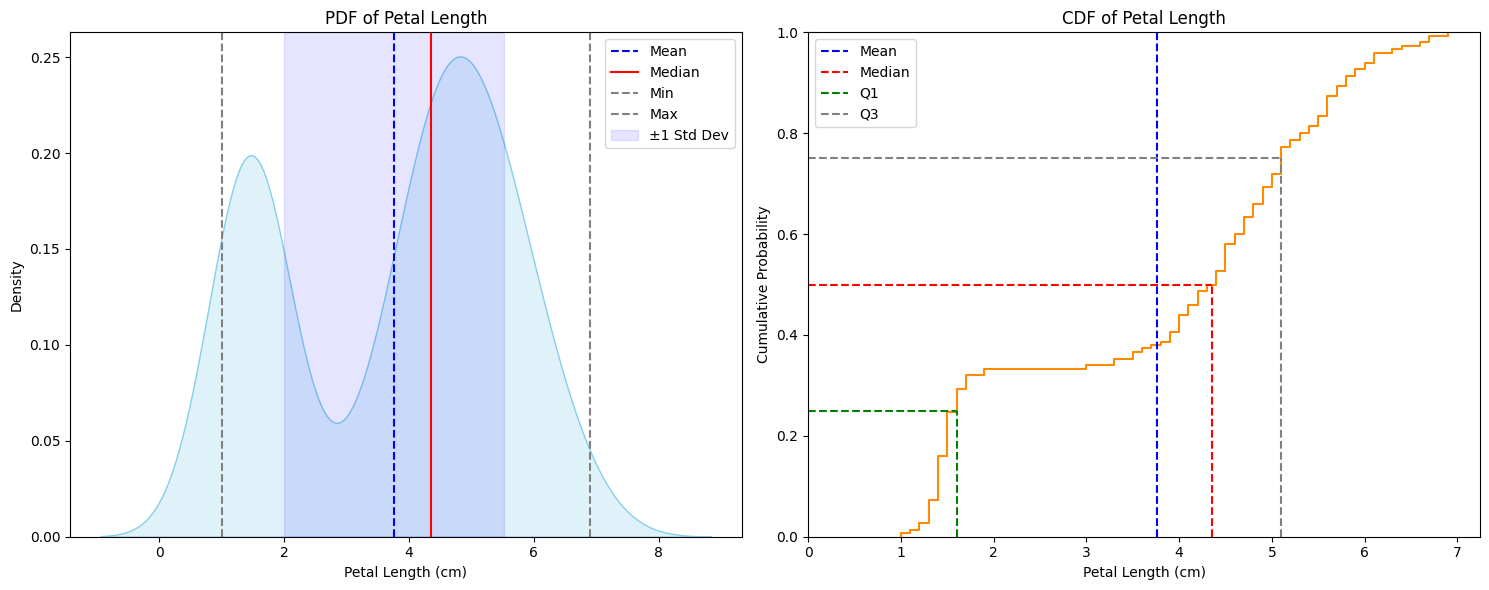

In [6]:
# Visual example

petal_length = dataset['petal_length']

# Create figure and axes
plt.figure(figsize=(15, 6))

### PDF (Probability Density Function)
plt.subplot(1, 2, 1)
sns.kdeplot(petal_length, fill=True, color='skyblue')
plt.title('PDF of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Density')

# Additional values for visualization
q1 = df['petal_length'].quantile(0.25)
q3 = df['petal_length'].quantile(0.75)
min_val = df['petal_length'].min()
max_val = df['petal_length'].max()
std = dispersion.loc['petal_length', 'Standard Deviation']
mean = central_tendency.loc['petal_length', 'Mean']
median = central_tendency.loc['petal_length', 'Median']

#Show Mean, Median, Range and Standard Deviation
plt.axvline(mean, color='blue', linestyle='--', label='Mean')
plt.axvline(median, color='red', linestyle='-', label='Median')
plt.axvline(min_val, color='grey', linestyle='--', label='Min')
plt.axvline(max_val, color='grey', linestyle='--', label='Max')
plt.axvspan(mean - std, mean + std, color='blue', alpha=0.1, label='±1 Std Dev')
plt.legend()


### CDF (Cumulative Distribution Function)
plt.subplot(1, 2, 2)
sns.ecdfplot(petal_length, color='darkorange')
plt.title('CDF of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Cumulative Probability')

#Show Mean, Median and IQR
plt.axvline(mean, color='blue', linestyle='--', label='Mean')

plt.hlines(0.5, xmin=0, xmax = median, color='red', linestyle='--', label='Median')
plt.vlines(median, ymin=0, ymax=0.5, color='red', linestyle='--')

plt.hlines(0.25, xmin=0, xmax = q1, color='green', linestyle='--', label='Q1')
plt.vlines(q1, ymin=0, ymax=0.25, color='green', linestyle='--')

plt.hlines(0.75, xmin=0, xmax = q3, color='gray', linestyle='--', label='Q3')
plt.vlines(q3, ymin=0, ymax=0.75, color='gray', linestyle='--')

plt.legend()
plt.xlim(xmin=0)
plt.ylim(ymin=0)


plt.tight_layout()
plt.show()